# Differentialgleichungen

## Vertiefung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


### Übersicht


1. Systeme von Differentialgleichungen
2. Euler mit zwei Gleichugnen
3. Lösung mit SciPy und Phasen-Portrait
4. Optionen von `solve_ivp`

### 1. Systeme von Differentialgleichungen

Beispiel **Gedämpfte Schwingung**

$$ x''(t) + \frac{k}{m} x'(t) + \frac{D}{m} x(t) = 0 $$

Hier sind

- $m$ die Masse in kg
- $k$ die Dämpfungskonstante in kg/s
- $D$ die Federkonstante in N/m = kg/s²

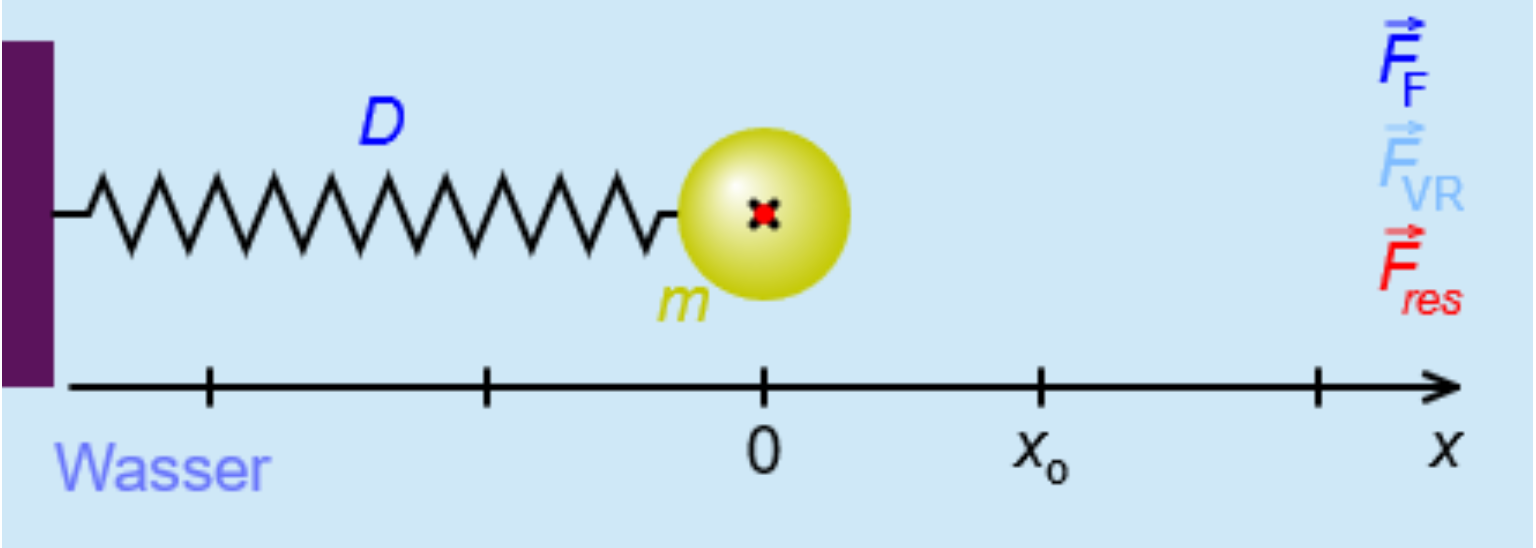

Hier gibt es eine Erklärung dazu: https://www.leifiphysik.de/mechanik/mechanische-schwingungen/grundwissen/federpendel-gedaempft

Es ist eine gewöhnliche Differentialgleichung 2. 2. Ordnung, weil die 2. Ableitung die höchste vorkommende Ableitung ist.

Wir schreiben sie in ein System von Differentialgleichungen um. Dazu definieren wir die Geschwindigkeit als *Hilfsvariable*

$$ v(t) = x'(t) $$

Und benutzen $v'(t) = x''(t)$, um folgendes zu erhalten:

$$
\begin{align*}
    x'(t) &= v(t) \\
    v'(t) &= -\frac{k}{m}v(t) - \frac{D}{m}x(t)
\end{align*}
$$

Wie lösen wir dieses System?

### 2. Euler mit zwei Gleichugnen


In [2]:
def euler(f, y0, t0, tend, h):
    """Euler-Verfahren für DGL 1. Ordung"""
    t, y = t0, y0
    ts, ys = [t], [y]
    while t <= tend:
        y = y + h * f(t, y)
        t = t + h
        ts.append(t)
        ys.append(y)
    return np.array(ts), np.array(ys)


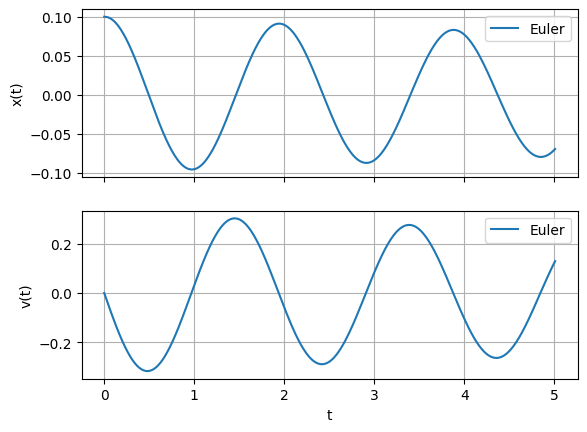

In [3]:
def f(t, y, k=0.1, D=5.25, m=0.5):
    x, v = y
    return np.array(
        (
            v,
            -(k * v + D * x) / m,
        )
    )


y0 = [0.1, 0]
t0 = 0
tend = 5
h = 0.01

t_euler, y_euler = euler(f, y0, t0, tend, h)
x_euler, v_euler = y_euler.T

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t_euler, x_euler, label="Euler")
ax2.plot(t_euler, v_euler, label="Euler")
ax1.set_ylabel("x(t)")
ax2.set_ylabel("v(t)")
ax2.set_xlabel("t")
ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()
plt.show()


### 3. Lösung mit SciPy und Phasen-Portrait


#### Lösung mit `scipy.integrate.solve_ivp`

Mit der Standardeinstellung berechnet [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) die Lösung mit einem Runge-Kutta-Verfahren 5. Ordnung. Das ist ein sehr guter Algorithmus, der auch für nichtlineare Systeme gut geeignet ist. Wir können aber auch andere Verfahren wählen. Dazu müssen wir die Option `method` angeben.



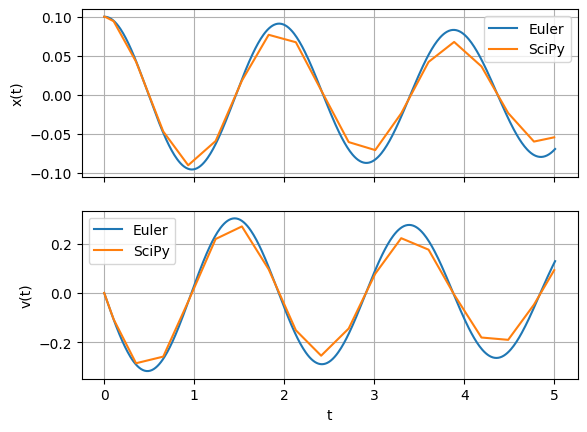

In [4]:
t = np.linspace(0, 5, 200)
sol = scipy.integrate.solve_ivp(f, t_span=(t.min(), t.max()), y0=[0.1, 0])

t_scipy = sol.t
x_scipy, v_scipy = sol.y


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t_euler, x_euler, label="Euler")
ax2.plot(t_euler, v_euler, label="Euler")
ax1.plot(t_scipy, x_scipy, label="SciPy")
ax2.plot(t_scipy, v_scipy, label="SciPy")
ax1.set_ylabel("x(t)")
ax2.set_ylabel("v(t)")
ax2.set_xlabel("t")
ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()
plt.show()


#### Option `t_eval`

Es werden nur so viele Punkte (Zeitpunkte) berechnet, dass die Lösung innerhalb der Toleranz liegt. Wir können aber auch die Anzahl der Punkte explizit angeben. Dazu müssen wir die Option `t_eval` angeben.

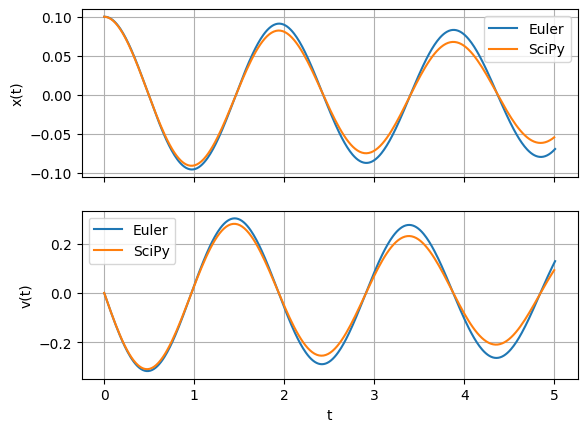

In [5]:
t = np.linspace(0, 5, 200)
sol = scipy.integrate.solve_ivp(
    f,
    t_span=(t.min(), t.max()),
    y0=[0.1, 0],
    t_eval=t,
)

t_scipy = sol.t
x_scipy, v_scipy = sol.y


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t_euler, x_euler, label="Euler")
ax2.plot(t_euler, v_euler, label="Euler")
ax1.plot(t_scipy, x_scipy, label="SciPy")
ax2.plot(t_scipy, v_scipy, label="SciPy")
ax1.set_ylabel("x(t)")
ax2.set_ylabel("v(t)")
ax2.set_xlabel("t")
ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()
plt.show()


#### Phasenportrait

Wir schauen uns den Verlauf der Dynamik in der $x$-$v$-Ebene an. (In der Physik bilden die Variablen $x$ und $v$ den Phasenraum.)

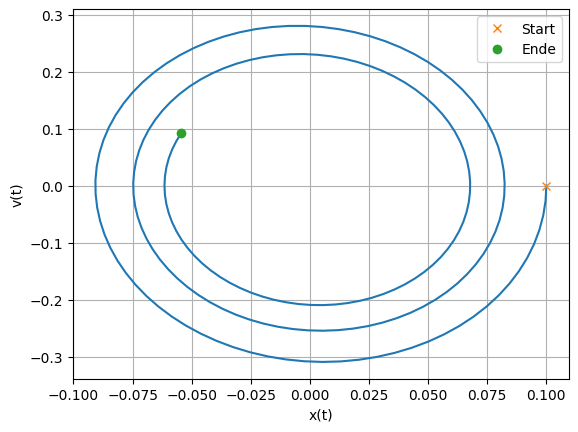

In [7]:
plt.plot(x_scipy, v_scipy)
plt.plot(x_scipy[0], v_scipy[0], "x", label="Start")
plt.plot(x_scipy[-1], v_scipy[-1], "o", label="Ende")
plt.xlabel("x(t)")
plt.ylabel("v(t)")
plt.grid()
plt.legend()
plt.show()


### 4. Optionen von `solve_ivp`

#### `dense_output`

Die Option `dense_output` von `solve_ivp` ermöglicht, die Lösung einer gewöhnlichen Differentialgleichung (ODE) auf einem dichten Gitter zu interpolieren. Wenn `dense_output=True` festgelegt wird, gibt `solve_ivp` eine Interpolationsfunktion zurück, welche die berechnete Lösung der ODE auf einem feineren Gitter interpoliert.

Es ist jedoch zu beachten, dass die Verwendung von `dense_output=True` die Berechnungszeit erhöhen kann, da die Lösung auf einem dichten Gitter berechnet und interpoliert werden muss. Daher sollte diese Option nur verwendet werden, wenn es notwendig ist, das interpolierte Ergebnis zu erhalten.

Dieses interpolierte Ergebnis kann nützlich sein, um beispielsweise Graphen der Lösung zu plotten oder numerisch abgeleitete Grössen wie Geschwindigkeit oder Beschleunigung zu berechnen.

In [ ]:
sol = scipy.integrate.solve_ivp(
    f,
    t_span=(t.min(), t.max()),
    y0=[0.1, 0],
    dense_output=True,
)
interpolation_function = sol.sol

t = np.linspace(0, 5, 200)
x_scipy, v_scipy = interpolation_function(t)


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t_euler, x_euler, label="Euler")
ax2.plot(t_euler, v_euler, label="Euler")
ax1.plot(t_scipy, x_scipy, label="SciPy")
ax2.plot(t_scipy, v_scipy, label="SciPy")
ax1.set_ylabel("x(t)")
ax2.set_ylabel("v(t)")
ax2.set_xlabel("t")
ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()
plt.show()
